In [10]:
#import libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
file_path = r"C:\Users\user\OneDrive - KasMub Digital Services\Documents\Prediction_Data.xlsx"


In [12]:
# defining the sheet i want the data to read from
sheet_name = 'ChurnData'

data = pd.read_excel(file_path, sheet_name = sheet_name)

data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


### Data Processing

In [14]:
#drop columns not needed for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis = 1)

In [15]:
#list columns to be labelled
columns_to_encode = [
    'Gender', 'Married','State', 'Value_Deal', 'Phone_Service','Multiple_Lines', 'Internet_Service','Internet_Type',
    'Online_Security',  'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data','Contract','Paperless_Billing', 'Payment_Method'
]

In [16]:
#encoding category variables excluding target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [17]:
#i need the customer status column to be encoded manually
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned':1})

In [18]:
#split data into target and features
x = data.drop('Customer_Status', axis = 1)
y = data['Customer_Status']

In [19]:

#split data into training and training sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### Train the Random Forest Model

In [21]:
#initalize the Random Forest  Classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [22]:
#train the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate Model

In [24]:
#make predictions
y_prediction = rf_model.predict(x_test)

In [25]:
#evaluate the model
print('Confusion Matrix')
print(confusion_matrix(y_test, y_prediction))
print("\nClassification Report:")
print(classification_report(y_test, y_prediction))

Confusion Matrix
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [26]:
#feature selection using feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

C:\Users\user\AppData\Local\Temp\ipykernel_10832\2924918378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = importances[indices], y = x.columns[indices],palette= ['#702254'])
C:\Users\user\AppData\Local\Temp\ipykernel_10832\2924918378.py:3: UserWarning: 
The palette list has fewer values (1) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = importances[indices], y = x.columns[indices],palette= ['#702254'])


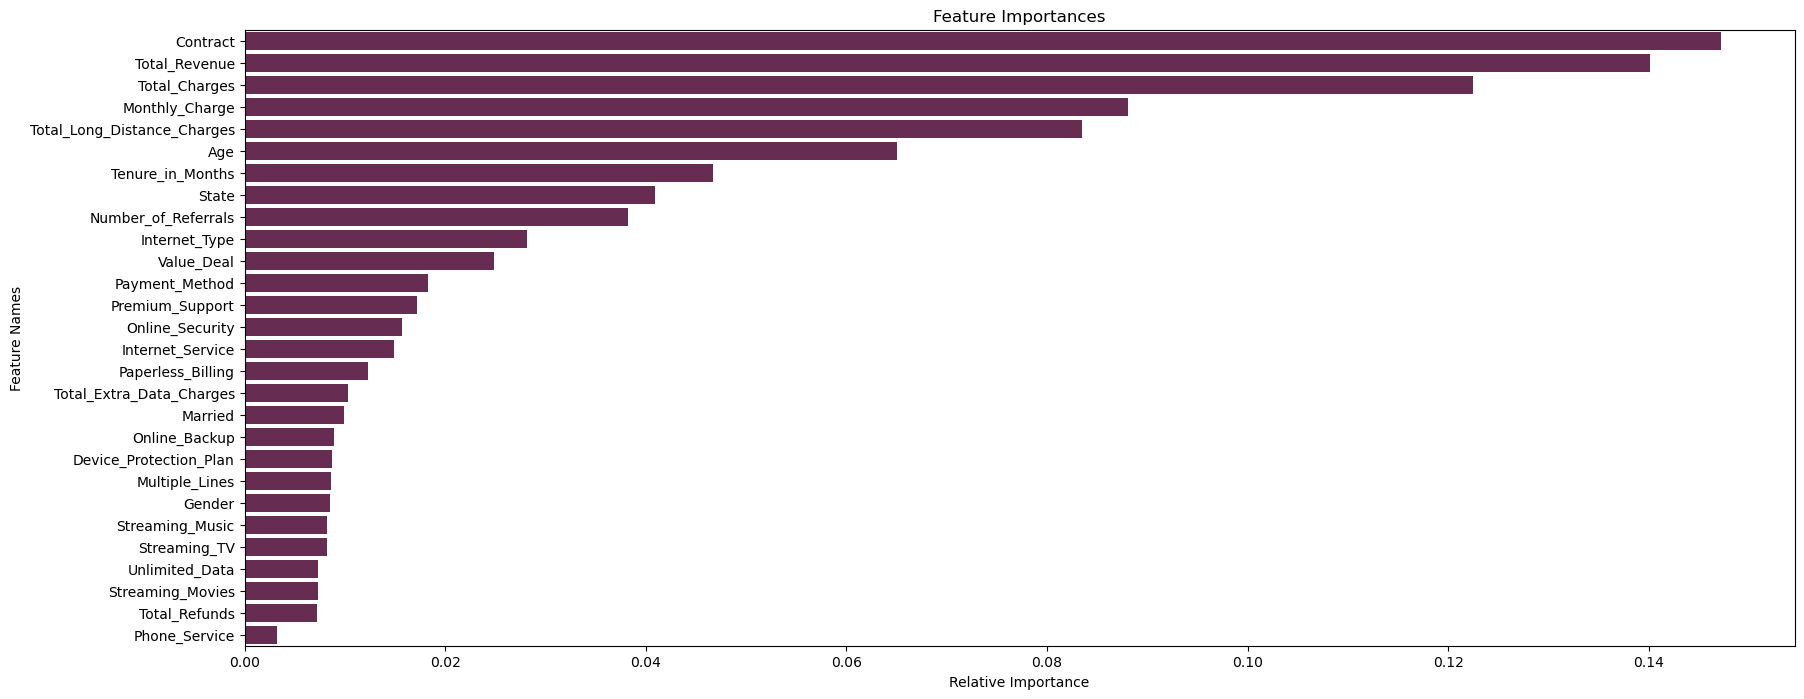

In [27]:
#visualize the feature importances
plt.figure(figsize = (20,8))
sns.barplot(x = importances[indices], y = x.columns[indices],palette= ['#702254'])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

### Prediction on New Data

In [29]:
file_path = r"C:\Users\user\OneDrive - KasMub Digital Services\Documents\Prediction_Data.xlsx"

In [30]:
# defining the sheet i want the data to read from
sheet_name = 'Joined_Data'

new_data = pd.read_excel(file_path, sheet_name = sheet_name)

new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [31]:
#retaining original data and customner_id column
original_data = new_data.copy()

customer_ids = new_data['Customer_ID']

In [32]:
#Drop unwanted columns
new_data = new_data.drop(['Customer_ID','Customer_Status','Churn_Category', 'Churn_Reason'], axis = 1)

In [33]:
#encoding categorical variables using the saved label encoder
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        le = label_encoders[column]
        # Expand the encoder classes to include new ones
        le.classes_ = np.append(le.classes_, list(set(new_data[column].unique()) - set(le.classes_)))
        new_data[column] = le.transform(new_data[column])


In [34]:
# Make predictions
new_predictions = rf_model.predict(new_data)


In [35]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [36]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [37]:
# Save the results
original_data.to_csv(r"C:\Users\user\Downloads\Predictions.csv", index=False)